**Base de datos con los rankings de 1990 a 2019**

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
atp_data = pd.read_csv('ATP_Rankings_1990-2019.csv')
print(atp_data.head(5))
print(atp_data.dtypes)

         Date Gender     Type Ranking         Player Country  Age Points  \
0  1990-01-01    men  singles       1     Ivan Lendl     USA   29      0   
1  1990-01-01    men  singles       2   Boris Becker     GER   22      0   
2  1990-01-01    men  singles       3  Stefan Edberg     SWE   23      0   
3  1990-01-01    men  singles       4   Brad Gilbert     USA   28      0   
4  1990-01-01    men  singles       5   John McEnroe     USA   30      0   

   Tournaments  
0            0  
1            0  
2            0  
3            0  
4            0  
Date           object
Gender         object
Type           object
Ranking        object
Player         object
Country        object
Age             int64
Points         object
Tournaments     int64
dtype: object


C:\Users\rodri\AppData\Local\Temp\ipykernel_3600\489590098.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  atp_data = pd.read_csv('ATP_Rankings_1990-2019.csv')


**Borro las columnas que no tienen utilidad**

In [32]:
atp_data = atp_data.drop(['Points', 'Tournaments', 'Gender', 'Type'], axis=1)


**Contemplo que no faltan datos**

<AxesSubplot: >

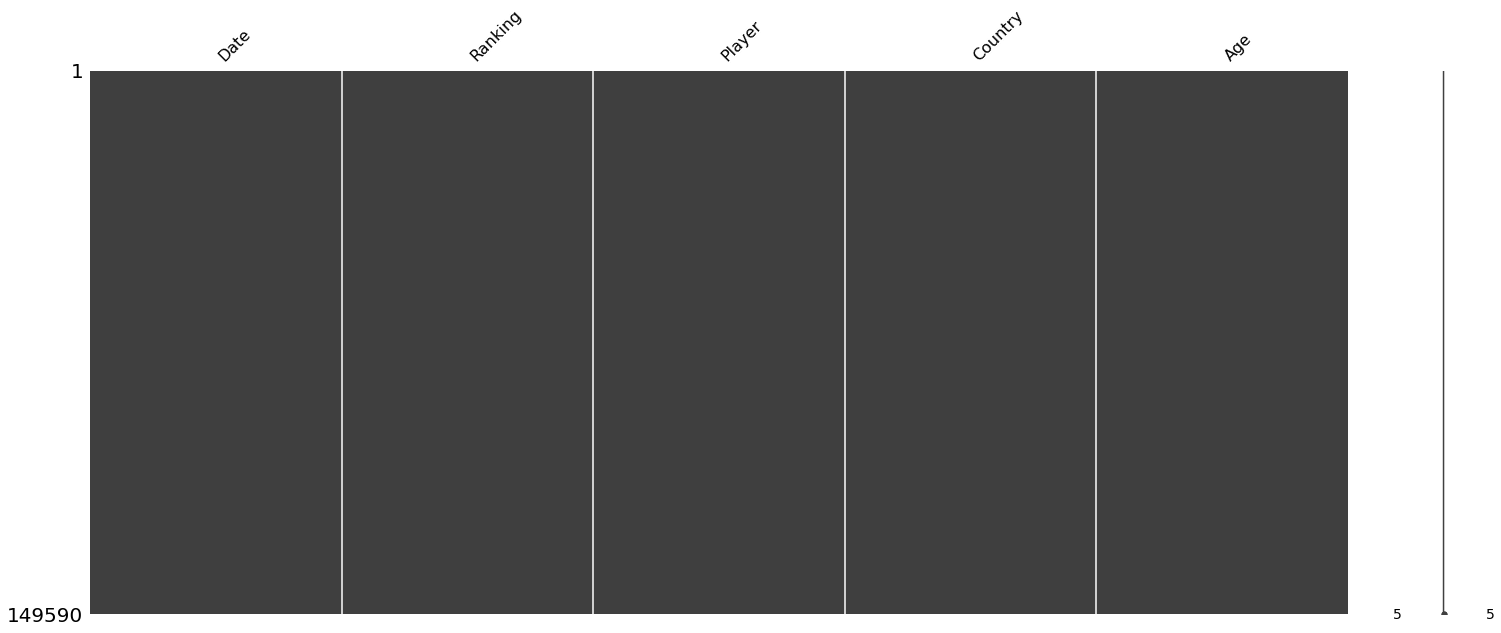

In [33]:
import missingno as msno
msno.matrix(atp_data)


In [ ]:
# Primero, elimina los caracteres no numéricos de la columna 'Ranking'
atp_data['Ranking'] = atp_data['Ranking'].str.extract('(\d+)').astype(int)

# Ahora, convierte la columna 'Ranking' a enteros
atp_data['Ranking'] = atp_data['Ranking'].astype(int)


In [62]:
import plotly.graph_objects as go

# Convertir columna de fechas a formato de fecha
atp_data['Date'] = pd.to_datetime(atp_data['Date'])

# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Contar el número de jugadores argentinos en el top 100 en cada fecha
num_argentinian_players = Argentina_data.groupby('Date')['Ranking'].count()

# Crear un objeto de figura de Plotly
fig = go.Figure()

# Agregar una línea para el número de jugadores argentinos en el top 100
fig.add_trace(
    go.Scatter(
        x=num_argentinian_players.index,
        y=num_argentinian_players.values,
        mode='lines',
        name='Argentinian Players'
    )
)

# Agregar etiquetas para el eje x e y
fig.update_layout(
    title='Evolution of argentinian players in top 100',
    xaxis_title='Date',
    yaxis_title='Players',
)

# Habilitar la visualización de los nombres de los jugadores al colocar el mouse encima de la línea
fig.update_traces(hovertemplate='Number of Players: %{y}<br>Date: %{x}<br>')

# Mostrar el gráfico interactivo
fig.show()


In [78]:
# Convertir columna de fechas a formato de fecha y extraer el año
atp_data['Date'] = pd.to_datetime(atp_data['Date'])
atp_data['Year'] = atp_data['Date'].dt.year

# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Contar el número de jugadores argentinos en el top 100 en cada año
num_argentinian_players = Argentina_data.groupby('Year')['Player'].nunique()

# Crear un objeto de figura de Plotly para el gráfico de barras
fig = go.Figure()

# Agregar una barra para el número de jugadores argentinos en el top 100 en cada año
fig.add_trace(
    go.Bar(
        x=num_argentinian_players.index,
        y=num_argentinian_players.values,
        name='Argentinian Players'
    )
)

# Agregar etiquetas para el eje x e y
fig.update_layout(
    title='Number of Argentinian players in top 100 by year',
    xaxis_title='Year',
    yaxis_title='Number of players',
)

# Mostrar el gráfico interactivo
fig.show()


In [83]:
# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Agregar una columna con el año de cada fecha
Argentina_data['Year'] = Argentina_data['Date'].dt.year

# Contar el número de jugadores únicos en el top 100 en cada año
num_argentinian_players = Argentina_data.groupby('Year')['Player'].agg(lambda x: ', '.join(x.unique()))

# Crear un objeto de figura de Plotly
fig = go.Figure()

# Agregar una tabla para mostrar el número de jugadores argentinos en el top 100 por año
fig.add_trace(
    go.Table(
        header=dict(values=['Year', 'Argentinian Players']),
        cells=dict(values=[num_argentinian_players.index, num_argentinian_players.values]),
    )
)

# Mostrar la tabla
fig.show()


C:\Users\rodri\AppData\Local\Temp\ipykernel_3600\1998174349.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

